In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.spatial.transform import Rotation

%matplotlib inline

## 2d case


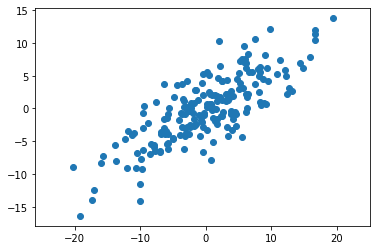

In [2]:
rng = np.random.RandomState(1)
angle = np.deg2rad(30.0)
true_rotation = np.array([[np.cos(angle), -np.sin(angle)],
                          [np.sin(angle), np.cos(angle)]])
x1 = rng.normal(scale=8, size=200)
x2 = x1*np.tan(angle) + rng.normal(scale=3, size=200)
x1 = x1-np.mean(x1)
x2 = x2-np.mean(x2)
X = np.array([x1,x2]).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

let's inspect the rotation matrix 

In [3]:
true_rotation

array([[ 0.8660254, -0.5      ],
       [ 0.5      ,  0.8660254]])

In [4]:
#inverse
np.array([[np.cos(-angle), -np.sin(-angle)],
        [np.sin(-angle), np.cos(-angle)]])

array([[ 0.8660254,  0.5      ],
       [-0.5      ,  0.8660254]])

okay now let's see what angle the data was rotated by from pca

In [5]:
pca = PCA(n_components=2)
pca.fit(X)
pca.components_
print(pca.components_)

[[-0.84128457 -0.54059252]
 [-0.54059252  0.84128457]]


okay, now use the pca components and the axes to determine the rotation angle

In [6]:
pc0 = pca.components_[0]
pc1 = pca.components_[1]
x_axis = np.array([1.0,0]) 
y_axis = np.array([0.0,1])
u_x_axis = x_axis/np.linalg.norm(x_axis)
u_y_axis = y_axis/np.linalg.norm(y_axis)
u_pc0 = pc0/np.linalg.norm(pc0)
u_pc1 = pc1/np.linalg.norm(pc1)
angle_x_0 = np.degrees(np.arccos(np.clip(np.dot(u_x_axis, u_pc0), -1, 1)))
angle_y_0 = np.degrees(np.arccos(np.clip(np.dot(u_y_axis, u_pc0), -1, 1)))
angle_x_1 = np.degrees(np.arccos(np.clip(np.dot(u_x_axis, u_pc1), -1, 1)))
angle_y_1 = np.degrees(np.arccos(np.clip(np.dot(u_y_axis, u_pc1), -1, 1)))
print(180 - angle_x_0, 90-angle_y_0)
print(90 - angle_x_1, angle_y_1)
print("for the 2d case we actually only have 1 rotation to worry about")

32.72398356575977 -32.72398356575977
-32.72398356575977 32.72398356575976
for the 2d case we actually only have 1 rotation to worry about


okay that seems reasonable, is there an easier way to recover those angles? 
yes, we actually didn't need to do anything:

In [7]:
angles_from_pca = pca.components_
np.degrees(-angles_from_pca)

array([[ 48.20205511,  30.97367   ],
       [ 30.97367   , -48.20205511]])

## plot to prove

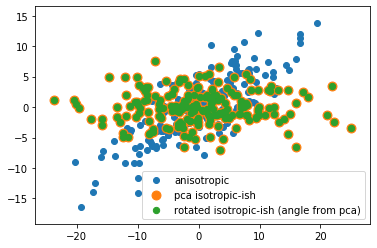

In [8]:
# plot input anisotropic data
plt.scatter(X[:, 0], X[:, 1], label='anisotropic')

# plot the data as transformed by pca
Xpca = pca.transform(X)
plt.scatter(Xpca[:, 0], Xpca[:, 1], label='pca isotropic-ish', s=80)

# plot the transformed data
Xt = np.matmul(pca.components_, X.T).T
plt.scatter(Xt[:, 0], Xt[:, 1], label='rotated isotropic-ish (angle from pca)', s=40)
plt.legend()
plt.axis('equal');

## 3d case

we will rotate our data by 30 degrees around the z axis counter clockwise and 20 degrees on x axis


In [9]:
import scipy 
scipy.__version__

'1.4.1'

In [11]:
Rotation.from_euler('zxy', [30, 0, 0], degrees=True).as_matrix()

array([[ 0.8660254, -0.5      ,  0.       ],
       [ 0.5      ,  0.8660254,  0.       ],
       [ 0.       ,  0.       ,  1.       ]])

In [12]:
Rotation.from_euler('zxy', [0, 20, 0], degrees=True).as_matrix()

array([[ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.93969262, -0.34202014],
       [ 0.        ,  0.34202014,  0.93969262]])

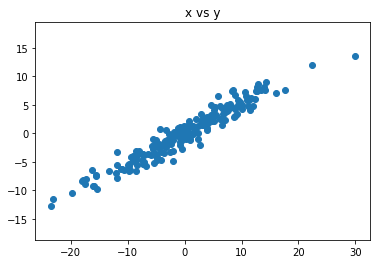

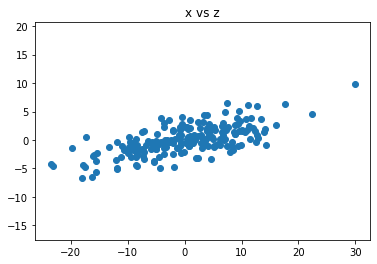

In [83]:
rng = np.random.RandomState(1)
r = Rotation.from_euler('zyx', [30, 0, 20], degrees=True)
true_rotation = r.as_matrix()
points = rng.randn(3, 200)
x1 = rng.normal(scale=10, size=200)
x2 = rng.normal(scale=1, size=200)
x3 = rng.normal(scale=2, size=200)
x1 = x1-np.mean(x1)
x2 = x2-np.mean(x2)
x3 = x3-np.mean(x3)
X = r.apply(np.array([x1,x2,x3]).T)
plt.scatter(X[:, 0], X[:, 1])
plt.title('x vs y')
plt.axis('equal')
plt.show()
plt.scatter(X[:, 0], X[:, 2])
plt.title('x vs z')
plt.axis('equal')
plt.show()

In [84]:
pca = PCA(n_components=3)
pca.fit(X)
pca.components_
print(pca.components_)


[[ 0.86750563  0.46595845  0.17411693]
 [ 0.01513154 -0.3745926   0.92706603]
 [ 0.49719717 -0.80160034 -0.33201186]]


In [85]:
angles_from_pca = pca.components_
np.degrees(-angles_from_pca)


array([[-49.70441113, -26.69745285,  -9.97616537],
       [ -0.8669733 ,  21.46257492, -53.11697078],
       [-28.4872993 ,  45.92831631,  19.02287805]])

(-31.33139097874664, 38.20517684012839, -7.515332634655594, 10.652476812303767)

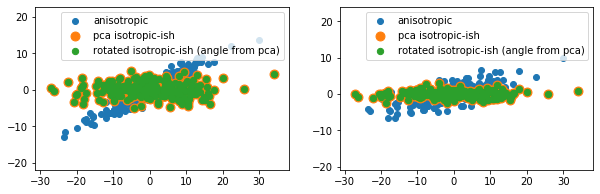

In [86]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3))
# plot input anisotropic data
ax1.scatter(X[:, 0], X[:, 1], label='anisotropic')
ax2.scatter(X[:, 0], X[:, 2], label='anisotropic')
# plot the data as transformed by pca
Xpca = pca.transform(X)
ax1.scatter(Xpca[:, 0], Xpca[:, 1], label='pca isotropic-ish', s=80)
ax2.scatter(Xpca[:, 0], Xpca[:, 2], label='pca isotropic-ish', s=80)
# plot the transformed data
Xt = np.matmul(pca.components_, X.T).T
ax1.scatter(Xt[:, 0], Xt[:, 1], label='rotated isotropic-ish (angle from pca)', s=40)
ax2.scatter(Xt[:, 0], Xt[:, 2], label='rotated isotropic-ish (angle from pca)', s=40)
ax1.legend()
ax2.legend()
ax1.axis('equal')
ax2.axis('equal')


In [87]:
Rotation.from_matrix(pca.components_).as_euler('zyx', degrees=True)

array([ -28.24133119,   10.02727314, -109.70406242])

In [88]:
np.degrees(pca.components_)

array([[ 49.70441113,  26.69745285,   9.97616537],
       [  0.8669733 , -21.46257492,  53.11697078],
       [ 28.4872993 , -45.92831631, -19.02287805]])

In [89]:
np.degrees(r.as_matrix())

array([[ 49.61960059, -28.64788976,   0.        ],
       [ 26.92021061,  46.62717252, -19.59631072],
       [  9.79815536,  16.9709029 ,  53.84042121]])

In [95]:
pca_r = Rotation.from_matrix(pca.components_)
print(pca_r.as_euler('xzy', degrees=True))
print(pca_r.as_euler('xyz', degrees=True))
print(pca_r.as_euler('yxz', degrees=True))
print(pca_r.as_euler('yzx', degrees=True))
print(pca_r.as_euler('zyx', degrees=True))
print(pca_r.as_euler('zxy', degrees=True))


[-112.00178567    0.86700638  -29.81849823]
[-112.49866528  -29.81473871    0.99928503]
[-123.73369105  -53.28319642 -128.79644357]
[  11.34903478  -27.7722692  -115.04696346]
[ -28.24133119   10.02727314 -109.70406242]
[177.68681441 -67.98198566 152.32614128]


In [106]:
Rotation.from_euler('zyx', r.as_euler('zyx', degrees=True).reshape(1,-1))

In [104]:
_ = Rotation.from_euler('zyx', r.as_matrix())
_.as_euler('zxy', degrees=True)

array([[ 49.61960059,   0.        , -28.64788976],
       [ 12.41122733, -13.31634269,  48.32983254],
       [ 31.57005052,  50.55348566,  27.34867368]])

False